In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers
import numpy as np

In [9]:
model = Sequential([
    layers.InputLayer(input_shape=(1000,)),
    layers.Dense(1000, 'relu'),
    layers.Concatenate(),
    layers.Dense(200, 'relu'),
    layers.Dense(100, 'softmax')
])

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 300)               120300    
                                                                 
 dense_7 (Dense)             (None, 200)               60200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
Total params: 200,600
Trainable params: 200,600
Non-trainable params: 0
_________________________________________________________________


In [11]:
input = keras.Input(shape=(1000,))
output = input
for _ in range(4):
    output = layers.Concatenate()([output, layers.Dense(1000, 'relu')(output)])
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 1000)         1001000     ['input_4[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 2000)         0           ['input_4[0][0]',                
                                                                  'dense_9[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 1000)         2001000     ['concatenate[0][0]']        

In [12]:
from tensorflow.keras.applications import Xception
model = Sequential([
    Xception(include_top=False, input_shape=(150, 150, 3)),
    layers.GlobalMaxPool2D(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

83683744/83683744 [==============================] - 48s 1us/step


In [13]:
print(len(model.layers)) #4
print(len(model.layers[0].layers)) #132

4
132


In [6]:
model = Sequential([
    layers.Dropout(0.999)
])
 
print(model(np.ones((1, 5))).numpy())
print(model(np.ones((1, 5)), training=True).numpy())

[[1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]]


11490434/11490434 [==============================] - 19s 2us/step
(60000, 784) float64
(10000, 784) float64
(60000,) [5 0 4 1 9 2 1 3 1 4]
(10000,) [7 2 1 0 4 1 4 9 5 9]


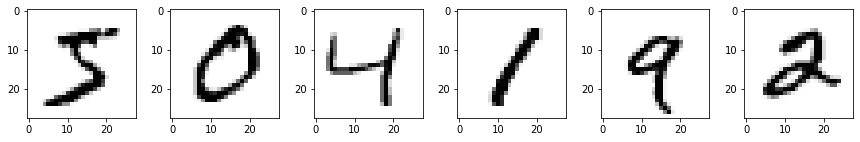

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, losses, optimizers
 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255
 
print(X_train.shape, X_train.dtype) #(60000, 784) float64
print(X_test.shape, X_test.dtype) #(10000, 784) float64
 
print(y_train.shape, y_train[:10]) #(60000,) [5 0 4 1 9 2 1 3 1 4]
print(y_test.shape, y_test[:10]) #(10000,) [7 2 1 0 4 1 4 9 5 9]
 
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 6, figsize=(15, 2))
for img, ax in zip(X_train, axes.flat):
    ax.imshow(img.reshape(28, 28), cmap='Greys')
plt.show()

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [16]:
model = Sequential([
    layers.InputLayer(28*28),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
])

In [17]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics='accuracy'
)
 
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=1024
)

Epoch 1/10
59/59 [==============================] - 15s 228ms/step - loss: 0.4753 - accuracy: 0.8738 - val_loss: 0.2039 - val_accuracy: 0.9406
Epoch 2/10
59/59 [==============================] - 16s 267ms/step - loss: 0.1585 - accuracy: 0.9538 - val_loss: 0.1232 - val_accuracy: 0.9638
Epoch 3/10
59/59 [==============================] - 18s 313ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.1011 - val_accuracy: 0.9681
Epoch 4/10
59/59 [==============================] - 14s 238ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.0825 - val_accuracy: 0.9748
Epoch 5/10
59/59 [==============================] - 14s 238ms/step - loss: 0.0550 - accuracy: 0.9842 - val_loss: 0.0761 - val_accuracy: 0.9758
Epoch 6/10
59/59 [==============================] - 18s 300ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 7/10
59/59 [==============================] - 15s 246ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0689 - val_accuracy: 0.9796

In [18]:
from tensorflow.keras.callbacks import *
ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, mode='max', save_best_only=True)

In [23]:
preds = []
from tqdm.notebook import tqdm
for i in tqdm(range(50)):
    model = Sequential([
    layers.InputLayer(28*28),
    layers.Dense(500, 'relu'),
    layers.Dense(500, 'relu'),
    layers.Dense(10)
    ])
    model.compile(
      loss=losses.SparseCategoricalCrossentropy(from_logits=True),
      optimizer=optimizers.Adam(),
      metrics='accuracy'
    )
    model.fit(X_train, y_train, epochs=10, batch_size=1024, verbose=0)
    preds.append(model.predict(X_test))
acc_fn = keras.metrics.sparse_categorical_accuracy
accuracies = [np.mean(acc_fn(y_test, pred)) for pred in preds]
np.median(accuracies)


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html